In [2]:
import os
import pandas as pd
import numpy as np
import librosa
import cv2
from sklearn.preprocessing import MinMaxScaler
import librosa.display
from collections import defaultdict
import matplotlib.pyplot as plt

In [6]:
# Function to count audio files in a directory
def count_audio_files(directory):
    return len([f for f in os.listdir(directory) if f.endswith('.wav')])

# Loading Data
patient_diagnosis_info = pd.read_csv(r'C:\Users\Jiary\Documents\GitHub\ML\csv_data\patient_diagnosis_filtered_data.csv',
                                     names=['pid', 'disease'])
print(patient_diagnosis_info.head())

total_patient_per_disease = patient_diagnosis_info['disease'].value_counts().to_dict()
print(f'Total Cases: {sum(total_patient_per_disease.values())}')


   pid  disease
0  101     URTI
1  102  Healthy
2  104     COPD
3  105     URTI
4  106     COPD
Total Cases: 123


In [15]:
initial_audio_data = r'C:\Users\Jiary\Documents\GitHub\ML\Processed_Audio_Files'
audio_dir = r'C:\Users\Jiary\Documents\GitHub\ML\Final_Audio_Dataset'

# Count audio files in both directories
initial_audio_count = count_audio_files(initial_audio_data)
final_audio_count = count_audio_files(audio_dir)

print(f'Number of audio files in Processed_Audio_Files: {initial_audio_count}')
print(f'Number of audio files in Final_Audio_Dataset: {final_audio_count}')

Number of audio files in Processed_Audio_Files: 6860
Number of audio files in Final_Audio_Dataset: 8015


In [6]:
# Function to organize files by disease
def organize_files_by_disease(directory, patient_diagnosis_info):
    disease_count = defaultdict(int)
    disease_files = defaultdict(list)

    for audio_file in os.listdir(directory):
        if audio_file.endswith('.wav'):  # Ensure only audio files are processed
            parts = audio_file.split('_')
            pid = int(parts[0])
            disease = patient_diagnosis_info.loc[patient_diagnosis_info['pid'] == pid, 'disease'].values[0]
            disease_count[disease] += 1
            disease_files[disease].append(os.path.join(directory, audio_file))
    
    return disease_count, disease_files


In [9]:
# Organize files by disease for Processed_Audio_Files
processed_disease_count, processed_disease_files = organize_files_by_disease(initial_audio_data, patient_diagnosis_info)

# Organize files by disease for Final_Audio_Dataset
final_disease_count, final_disease_files = organize_files_by_disease(audio_dir, patient_diagnosis_info)

# Print disease-wise counts for Processed_Audio_Files
print("\nDisease-wise counts for Processed_Audio_Files:")
for disease, count in processed_disease_count.items():
    print(f'Number of Audio Samples: {count}, Disease: {disease}')

# Print disease-wise counts for Final_Audio_Dataset
print("\nDisease-wise counts for Final_Audio_Dataset:")
for disease, count in final_disease_count.items():
    print(f'Number of Audio Samples: {count}, Disease: {disease}')


Disease-wise counts for Processed_Audio_Files:
Number of Audio Samples: 243, Disease: URTI
Number of Audio Samples: 322, Disease: Healthy
Number of Audio Samples: 5746, Disease: COPD
Number of Audio Samples: 104, Disease: Bronchiectasis
Number of Audio Samples: 285, Disease: Pneumonia
Number of Audio Samples: 160, Disease: Bronchiolitis

Disease-wise counts for Final_Audio_Dataset:
Number of Audio Samples: 463, Disease: URTI
Number of Audio Samples: 547, Disease: Healthy
Number of Audio Samples: 5746, Disease: COPD
Number of Audio Samples: 349, Disease: Bronchiectasis
Number of Audio Samples: 520, Disease: Pneumonia
Number of Audio Samples: 390, Disease: Bronchiolitis


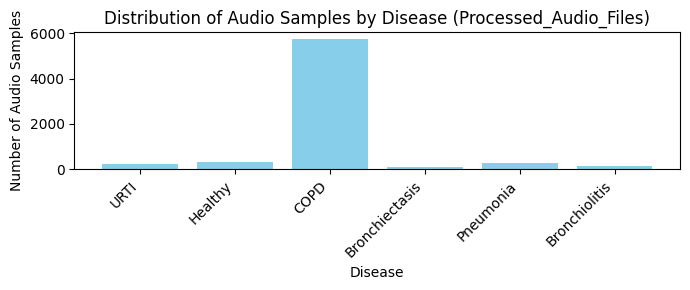

In [21]:
# Visualization for Processed_Audio_Files
#%matplotlib inline
plt.figure(figsize=(7, 3))
plt.bar(processed_disease_count.keys(), processed_disease_count.values(), color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Number of Audio Samples')
plt.title('Distribution of Audio Samples by Disease (Processed_Audio_Files)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

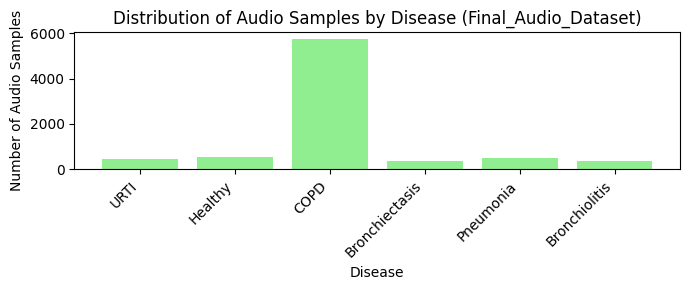

In [23]:
plt.figure(figsize=(7, 3))
plt.bar(final_disease_count.keys(), final_disease_count.values(), color='lightgreen')
plt.xlabel('Disease')
plt.ylabel('Number of Audio Samples')
plt.title('Distribution of Audio Samples by Disease (Final_Audio_Dataset)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


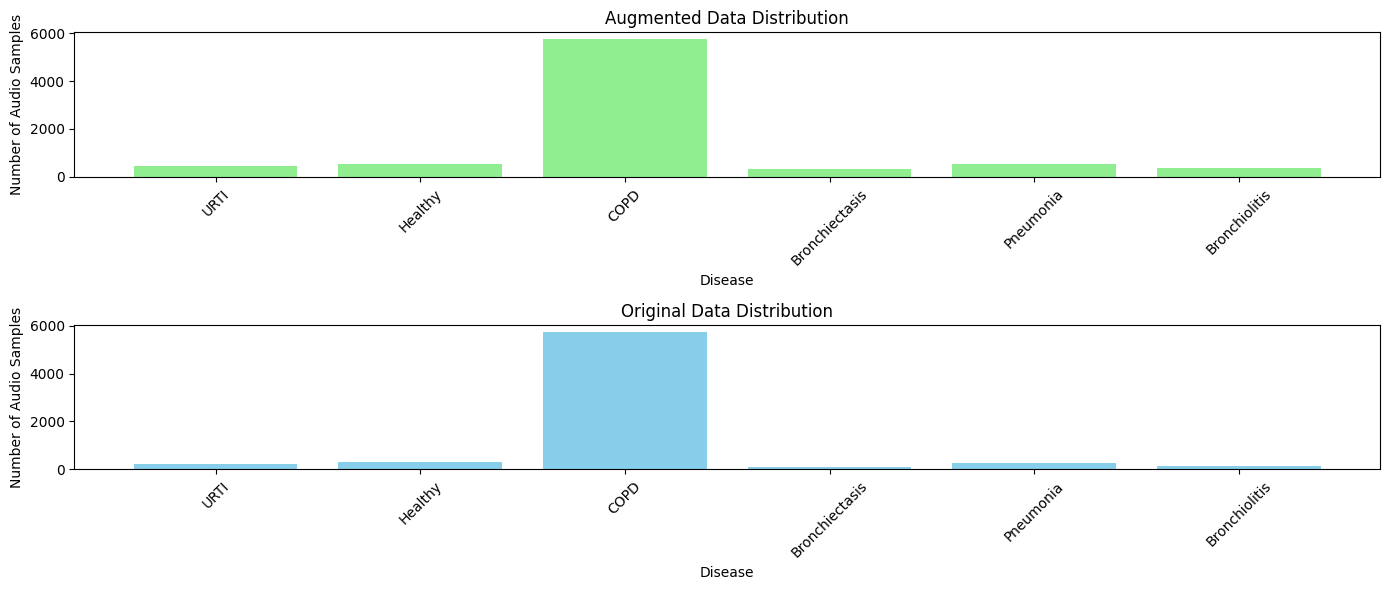

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(14, 6))
axes[0].bar(final_disease_count.keys(), final_disease_count.values(), color='lightgreen')
axes[0].set_xlabel('Disease')
axes[0].set_ylabel('Number of Audio Samples')
axes[0].set_title('Augmented Data Distribution')
axes[0].tick_params( axis='x', rotation=45)

axes[1].bar(processed_disease_count.keys(), processed_disease_count.values(), color='skyblue')
axes[1].set_xlabel('Disease')
axes[1].set_ylabel('Number of Audio Samples')
axes[1].set_title('Original Data Distribution')
axes[1].tick_params( axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [16]:
#feature extraction for Ml train and evaluation
spectogram_folder=r'C:\Users\Jiary\Documents\GitHub\ML\Spectograms'
os.makedirs(spectogram_folder, exist_ok=True)
diseases=patient_diagnosis_info['disease'].unique()
print(diseases)

def make_spectrogram(audio_path, target_shape=(128,128)):
    y,sr=librosa.load(audio_path, sr=None)
    s=librosa.feature.melspectrogram(y=y, sr=sr)
    s_db=librosa.amplitude_to_db(s, ref=np.max)
    s_resized=cv2.resize(s_db,target_shape)
    return np.expand_dims(s_resized, axis=-1)

for filename in os.listdir(audio_dir):
    if filename.endswith('.wav'):
        parts=filename.split('_')
        pid=parts[0]
        try:

            disease=patient_diagnosis_info.loc[patient_diagnosis_info['pid']==int(pid),'disease'].values[0]
        except:
            print(f'No disease information found for {pid}')
            continue
        
        output_filename=filename.replace('.wav','.npy')
        output_path=os.path.join(spectogram_folder, output_filename)

        audio_path=os.path.join(audio_dir, filename)
        mel_spectogram=make_spectrogram(audio_path)
        np.save(output_path, mel_spectogram)
        print(f'Processed {filename} and saved as {output_filename}')


['URTI' 'Healthy' 'COPD' 'Bronchiectasis' 'Pneumonia' 'Bronchiolitis']
Processed 101_1b1_Al_sc_Meditron_seg0_C0.0_W0.0.wav and saved as 101_1b1_Al_sc_Meditron_seg0_C0.0_W0.0.npy
Processed 101_1b1_Al_sc_Meditron_seg10_C0.0_W0.0.wav and saved as 101_1b1_Al_sc_Meditron_seg10_C0.0_W0.0.npy
Processed 101_1b1_Al_sc_Meditron_seg11_C0.0_W0.0.wav and saved as 101_1b1_Al_sc_Meditron_seg11_C0.0_W0.0.npy
Processed 101_1b1_Al_sc_Meditron_seg1_C0.0_W0.0.wav and saved as 101_1b1_Al_sc_Meditron_seg1_C0.0_W0.0.npy
Processed 101_1b1_Al_sc_Meditron_seg2_C0.0_W0.0.wav and saved as 101_1b1_Al_sc_Meditron_seg2_C0.0_W0.0.npy
Processed 101_1b1_Al_sc_Meditron_seg3_C0.0_W0.0.wav and saved as 101_1b1_Al_sc_Meditron_seg3_C0.0_W0.0.npy
Processed 101_1b1_Al_sc_Meditron_seg4_C0.0_W0.0.wav and saved as 101_1b1_Al_sc_Meditron_seg4_C0.0_W0.0.npy
Processed 101_1b1_Al_sc_Meditron_seg5_C0.0_W0.0.wav and saved as 101_1b1_Al_sc_Meditron_seg5_C0.0_W0.0.npy
Processed 101_1b1_Al_sc_Meditron_seg6_C0.0_W0.0.wav and saved as 101_

C:\Users\Jiary\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1848
  warnings.warn(


Processed 109_1b1_Lr_sc_Litt3200_seg7_C1.0_W0.0.wav and saved as 109_1b1_Lr_sc_Litt3200_seg7_C1.0_W0.0.npy
Processed 109_1b1_Pl_sc_Litt3200_seg0_C0.0_W0.0.wav and saved as 109_1b1_Pl_sc_Litt3200_seg0_C0.0_W0.0.npy
Processed 109_1b1_Pl_sc_Litt3200_seg1_C0.0_W0.0.wav and saved as 109_1b1_Pl_sc_Litt3200_seg1_C0.0_W0.0.npy
Processed 109_1b1_Pl_sc_Litt3200_seg2_C0.0_W0.0.wav and saved as 109_1b1_Pl_sc_Litt3200_seg2_C0.0_W0.0.npy
Processed 109_1b1_Pl_sc_Litt3200_seg3_C0.0_W0.0.wav and saved as 109_1b1_Pl_sc_Litt3200_seg3_C0.0_W0.0.npy
Processed 109_1b1_Pl_sc_Litt3200_seg4_C0.0_W0.0.wav and saved as 109_1b1_Pl_sc_Litt3200_seg4_C0.0_W0.0.npy
Processed 109_1b1_Pl_sc_Litt3200_seg5_C0.0_W0.0.wav and saved as 109_1b1_Pl_sc_Litt3200_seg5_C0.0_W0.0.npy
Processed 109_1b1_Pl_sc_Litt3200_seg6_C0.0_W0.0.wav and saved as 109_1b1_Pl_sc_Litt3200_seg6_C0.0_W0.0.npy
Processed 109_1b1_Pl_sc_Litt3200_seg7_C0.0_W0.0.wav and saved as 109_1b1_Pl_sc_Litt3200_seg7_C0.0_W0.0.npy
Processed 109_1b1_Pl_sc_Litt3200_seg8